In [1]:
! pip install resampy

   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
    --------------------------------------- 0.0/3.1 MB 98.5 kB/s eta 0:00:31
   - -------------------------------------- 0.1/3.1 MB 238.8 kB/s eta 0:00:13
   - -------------------------------------- 0.1/3.1 MB 238.8 kB/s eta 0:00:13
   - -------------------------------------- 0.1/3.1 MB 238.8 kB/s eta 0:00:13
   - -------------------------------------- 0.1/3.1 MB 238.8 kB/s eta 0:00:13
   - -------------------------------------- 0.1/3.1 MB 238.8 kB/s eta 0:00:13
   - -------------------------------------- 0.1/3.

In [3]:
! pip install seaborn
! pip install tqdm
! pip install tensorflow

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any

In [30]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Reshape,MaxPooling2D, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
import os

paths = []
labels = []

# Define the root directory
root_dir = 'AUDIO'

# Iterate through the subdirectories
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Add all files in the subdirectory
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            paths.append(file_path)
            # Add label based on the subdirectory name
            labels.append(subdir)

print('Dataset is loaded')

Dataset is loaded


In [6]:
len(paths)

20008

In [7]:
paths[:5]

['AUDIO\\deepfake_audio\\FurqanAIClone.wav',
 'AUDIO\\deepfake_audio\\HimanshuAIClone.wav',
 'AUDIO\\deepfake_audio\\LJ001-0001_gen.wav',
 'AUDIO\\deepfake_audio\\LJ001-0002_gen.wav',
 'AUDIO\\deepfake_audio\\LJ001-0003_gen.wav']

In [8]:
len(labels)

20008

In [9]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

In [10]:
df['label'].value_counts()

label
deepfake_audio    10004
real_audio        10004
Name: count, dtype: int64

In [11]:
audio_path = 'AUDIO'
real_audio_path = 'real_audio'
fake_audio_path = 'deepfake_audio'

In [12]:
folders = os.listdir(audio_path)
print(folders)

['deepfake_audio', 'real_audio']


In [13]:
real_audio = 'AUDIO/real_audio/Furqanreal.wav'
fake_audio = 'AUDIO/deepfake_audio/FurqanAIClone.wav'

In [14]:
print('Real Audio:')
IPython.display.Audio(real_audio)

Real Audio:


In [15]:
print('Fake Audio:')
IPython.display.Audio(fake_audio)

Fake Audio:


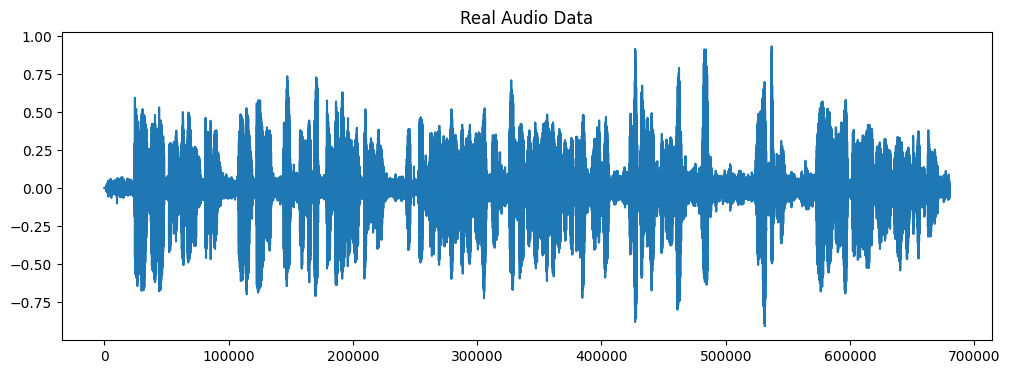

In [16]:
real_ad, real_sr = librosa.load(real_audio)
plt.figure(figsize= (12,4))
plt.plot(real_ad)
plt.title('Real Audio Data')
plt.show()

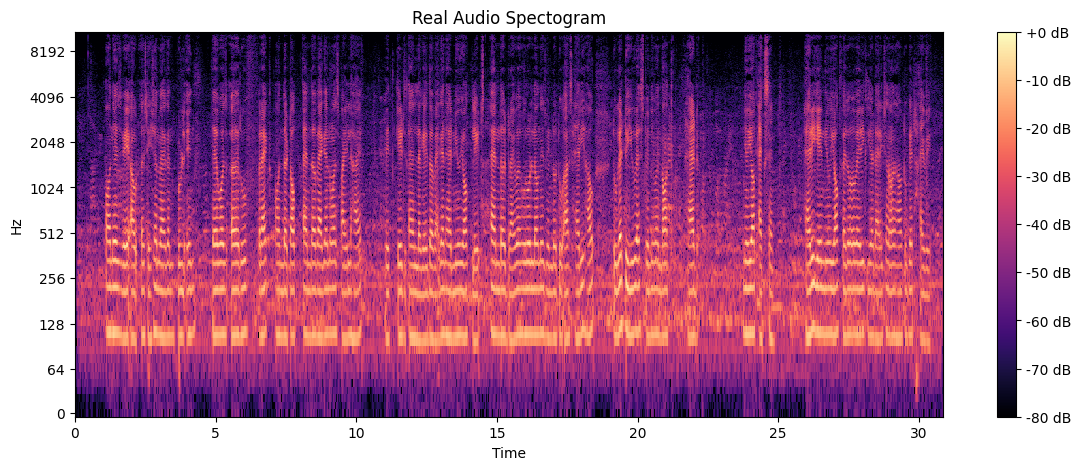

In [17]:
real_spec = np.abs(librosa.stft(real_ad))
real_spec = librosa.amplitude_to_db(real_spec, ref = np.max)
plt.figure(figsize=(14,5))
librosa.display.specshow(real_spec, sr = real_sr, x_axis = 'time', y_axis = 'log')
plt.colorbar(format = '%+2.0f dB')
plt.title("Real Audio Spectogram")
plt.show()

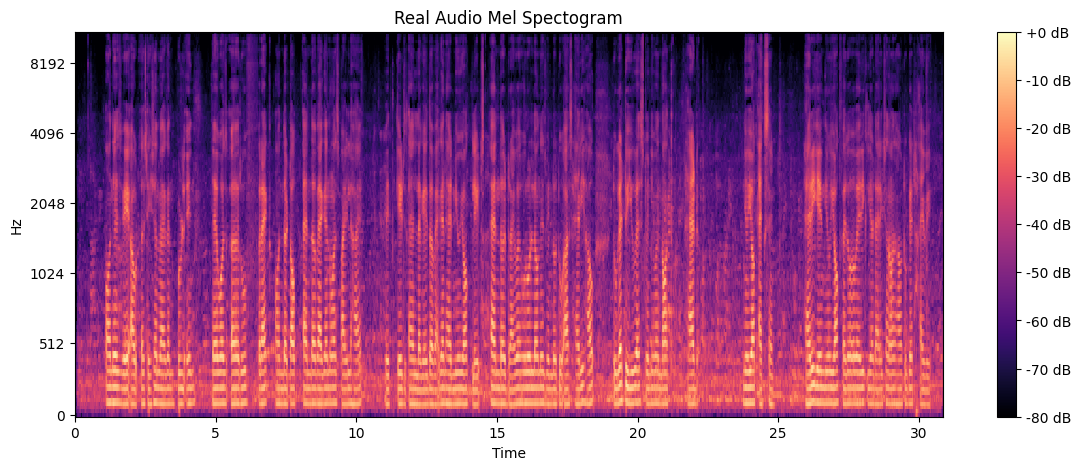

In [18]:
real_mel_spect = librosa.feature.melspectrogram(y = real_ad, sr = real_sr)
real_mel_spect = librosa.power_to_db(real_mel_spect, ref = np.max)
plt.figure(figsize = (14,5))
librosa.display.specshow(real_mel_spect, y_axis ='mel', x_axis = 'time')
plt.title('Real Audio Mel Spectogram')
plt.colorbar(format = '%+2.0f dB')
plt.show()

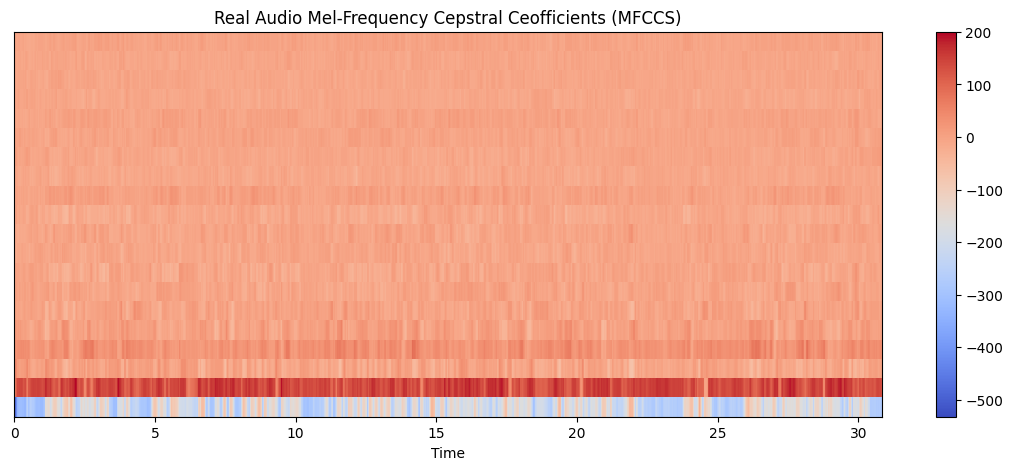

In [20]:
real_mfcc = librosa.feature.mfcc(y = real_ad, sr = real_sr)
plt.figure(figsize = (14,5))
librosa.display.specshow(real_mfcc, sr = real_sr, x_axis ='time')
plt.colorbar()
plt.title('Real Audio Mel-Frequency Cepstral Ceofficients (MFCCS)')
plt.show()

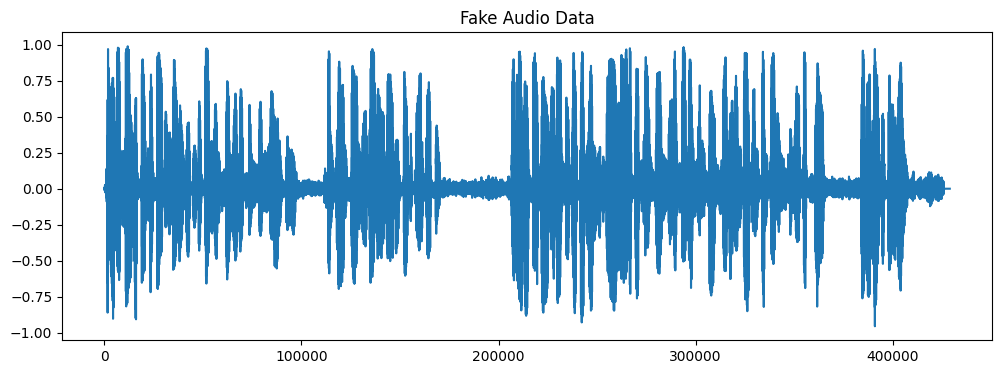

In [22]:
fake_ad, fake_sr = librosa.load(fake_audio)
plt.figure(figsize =(12,4))
plt.plot(fake_ad)
plt.title("Fake Audio Data")
plt.show()

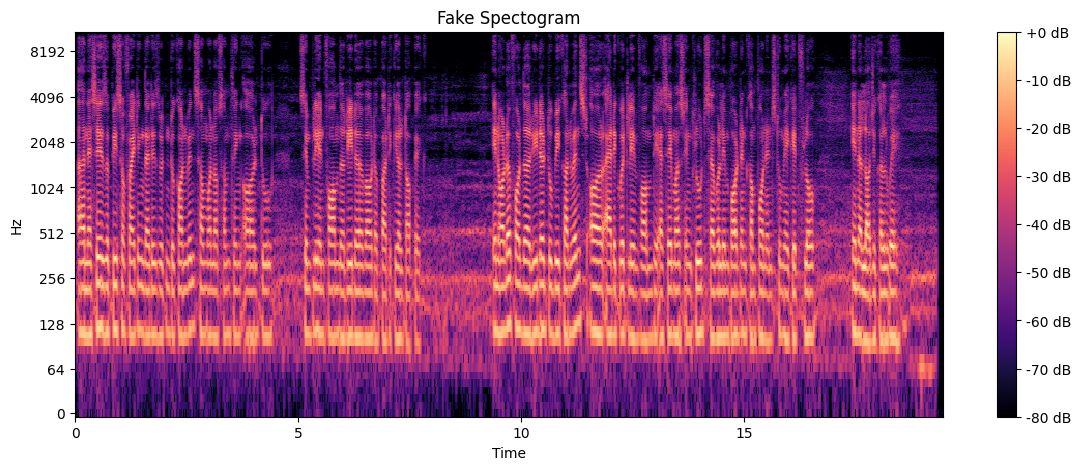

In [23]:
fake_spec = np.abs(librosa.stft(fake_ad))
fake_spec = librosa.amplitude_to_db(fake_spec, ref = np.max)
plt.figure(figsize=(14,5))
librosa.display.specshow(fake_spec, sr = fake_sr, x_axis = 'time', y_axis = 'log')
plt.colorbar(format = '%+2.0f dB')
plt.title("Fake Spectogram")
plt.show()

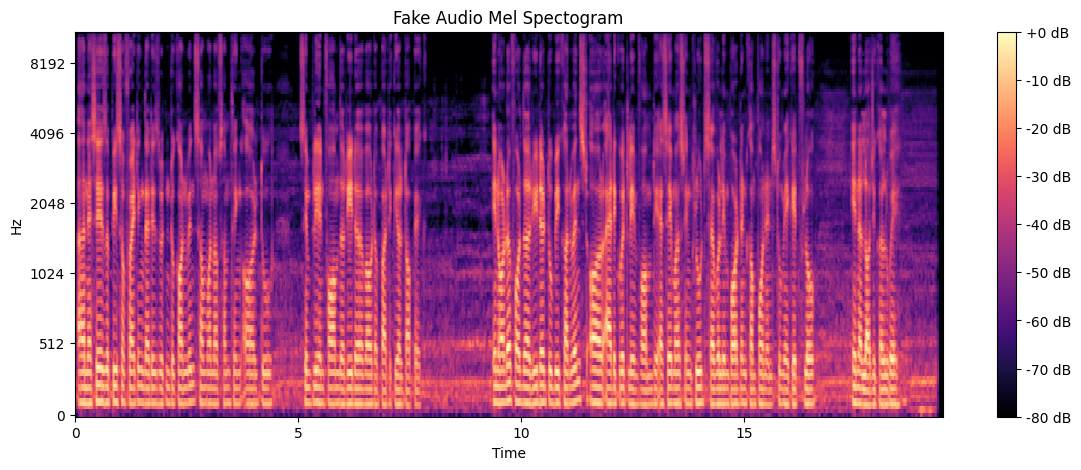

In [24]:
fake_mel_spect = librosa.feature.melspectrogram(y = fake_ad, sr = fake_sr)
fake_mel_spect = librosa.power_to_db(fake_mel_spect, ref = np.max)
plt.figure(figsize = (14,5))
librosa.display.specshow(fake_mel_spect, y_axis ='mel', x_axis = 'time')
plt.title('Fake Audio Mel Spectogram')
plt.colorbar(format = '%+2.0f dB')
plt.show()

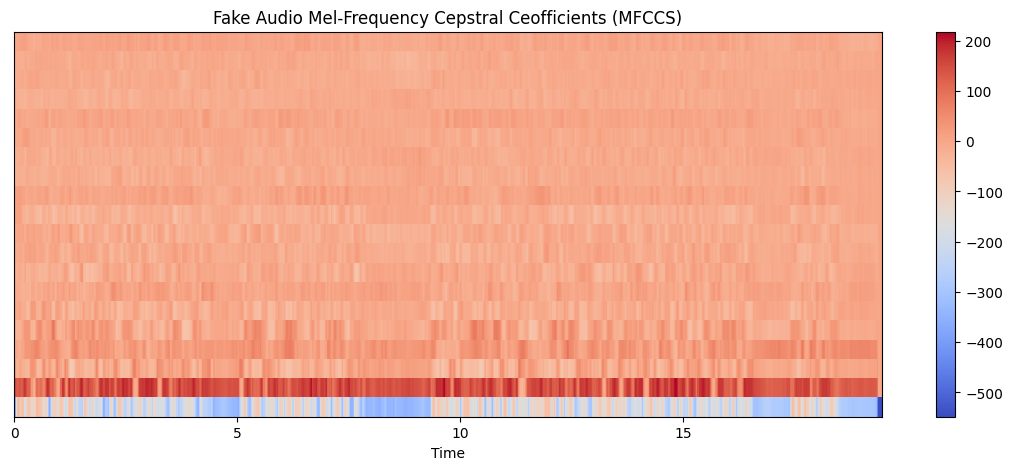

In [26]:
fake_mfcc = librosa.feature.mfcc(y = fake_ad, sr = fake_sr)
plt.figure(figsize = (14,5))
librosa.display.specshow(fake_mfcc, sr = fake_sr, x_axis ='time')
plt.colorbar()
plt.title('Fake Audio Mel-Frequency Cepstral Ceofficients (MFCCS)')
plt.show()

Preprocessing

In [28]:
from tqdm import tqdm
import numpy as np
import os
import librosa

def extract_features(audio_path, max_length=500):
    features = []
    labels = []
    for folder in os.listdir(audio_path):
        folder_path = os.path.join(audio_path, folder)
        for file in tqdm(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, file)
            try:
                # Load audio file
                audio, _ = librosa.load(file_path, sr=16000)
                # Extract features (example: using Mel-Frequency Cepstral Coefficients)
                mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
                # Pad or trim the feature array to a fixed length
                if mfccs.shape[1] < max_length:
                    mfccs = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
                else:
                    mfccs = mfccs[:, :max_length]
                features.append(mfccs)
                # Assign label
                if folder == 'deepfake_audio':
                    labels.append(1)  # 1 for fake
                else:
                    labels.append(0)  # 0 for real
            except Exception as e:
                print(f"Error encountered while parsing file: {file_path}")
                continue
    return np.array(features), np.array(labels)

# Example usage
audio_path = 'AUDIO'
x, y = extract_features(audio_path)

print("Features shape:", x.shape)
print("Labels shape:", y.shape)

100%|██████████| 10004/10004 [06:15<00:00, 26.67it/s]


Features shape: (20008, 40, 500)
Labels shape: (20008,)


In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .1)

In [31]:
model = Sequential([
    Reshape((40, 500, 1), input_shape=xtrain.shape[1:]),  # Reshape input to add channel dimension
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics  = ['accuracy'])

In [33]:
model.fit(xtrain, ytrain, epochs =100 , batch_size = 32, validation_data = [xtest,ytest])

Epoch 1/100


563/563 [==============================] - 186s 321ms/step - loss: 1.0390 - accuracy: 0.4868 - val_loss: 0.6932 - val_accuracy: 0.4893
Epoch 2/100
563/563 [==============================] - 163s 289ms/step - loss: 0.6917 - accuracy: 0.5276 - val_loss: 0.6860 - val_accuracy: 0.5482
Epoch 3/100
563/563 [==============================] - 178s 316ms/step - loss: 0.6209 - accuracy: 0.6434 - val_loss: 0.6418 - val_accuracy: 0.6482
Epoch 4/100
563/563 [==============================] - 185s 329ms/step - loss: 0.4131 - accuracy: 0.8084 - val_loss: 0.3314 - val_accuracy: 0.8551
Epoch 5/100
563/563 [==============================] - 163s 289ms/step - loss: 0.3175 - accuracy: 0.8603 - val_loss: 0.2975 - val_accuracy: 0.8841
Epoch 6/100
563/563 [==============================] - 169s 301ms/step - loss: 0.2491 - accuracy: 0.8939 - val_loss: 0.3337 - val_accuracy: 0.8671
Epoch 7/100
563/563 [==============================] - 169s 301ms/step - loss: 0.2082 - accuracy: 0.9145 - val_loss:

In [34]:
from keras.models import save_model
# Save the model
model.save('cnn.h5')

c:\Users\manoj\OneDrive\Desktop\DeepFake-Audio-Detection-MFCC\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
loss,accuracy = model.evaluate(xtest,ytest)

63/63 [==============================] - 7s 99ms/step - loss: 1.1180 - accuracy: 0.8766
